In [ ]:
 import pandas as pd #bow(bag of words)

 document = ['this document 1','this document 1']

 from sklearn.feature_extraction.text import  CountVectorizer
 count_vectorizer = CountVectorizer()
 bow = count_vectorizer.fit_transform(document)
 bow
 bow_df = pd.DataFrame(bow.toarray(), columns=count_vectorizer.get_feature_names_out())
 print(bow_df)

   document  this
0         1     1
1         1     1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Product_Reviews.csv')

In [4]:
df.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [5]:
df.describe()

,Product ID,Product Review,Sentiment
count,1007,1007,1007
unique,66,908,3
top,AVpfpK8KLJeJML43BCuD,I'm a huge fan of the Echo family. I have two ...,POSITIVE
freq,542,6,852


In [6]:
df.shape

(1007, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB


In [8]:
#EDA(EXPOLATORY DATA ANALYSIS)

In [9]:
df.duplicated().sum()

np.int64(2)

In [10]:
df[df.duplicated()]

,Product ID,Product Review,Sentiment
191,AVpfLiCSilAPnD_xWpk_,Read more,POSITIVE
391,AVpe7LD5LJeJML43ybWA,Read more,POSITIVE


In [11]:
#drop duplicate
df.drop_duplicates(inplace=True)


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [14]:
df.isnull().sum(axis=1).sort_values(ascending=False)

,0
1006,0
0,0
1,0
2,0
3,0
...,...
17,0
16,0
15,0
14,0


In [15]:
# Check distribution of sentiments
print("\n Sentiment Analysis")
print(df['Sentiment'].value_counts())



 Sentiment Analysis
Sentiment
POSITIVE    850
NEUTRAL      81
NEGATIVE     74
Name: count, dtype: int64


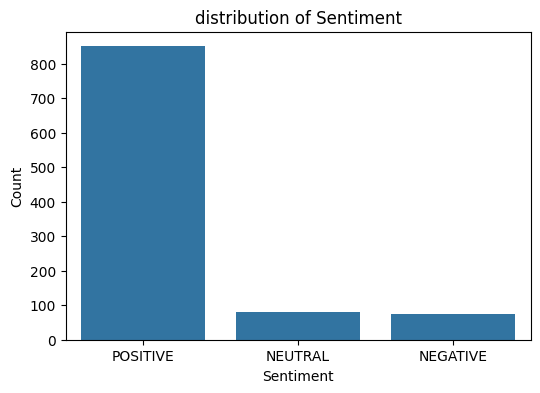

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment',data=df)
plt.title('distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
#remove all special characters
import re
def remove_special_characters(text):
  return re.sub(r'[^a-zA-Z\s]','',str(text))

df['cleaned_review']=df['Product Review'].apply(remove_special_characters)
print('\nSample cleaned_review:')
display(df[['Product Review', 'cleaned_review']].head())


Sample cleaned_review:


,Product Review,cleaned_review
0,I initially had trouble deciding between the p...,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,I am enjoying it so far Great for reading Had ...
3,I bought one of the first Paperwhites and have...,I bought one of the first Paperwhites and have...
4,I have to say upfront - I don't like coroporat...,I have to say upfront I dont like coroporate ...


In [18]:
# to convert text in lowercase
df['cleaned_review']=df['cleaned_review'].str.lower()
df.head()



,Product ID,Product Review,Sentiment,cleaned_review
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE,i initially had trouble deciding between the p...
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE,allow me to preface this with a little history...
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE,i am enjoying it so far great for reading had ...
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE,i bought one of the first paperwhites and have...
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE,i have to say upfront i dont like coroporate ...


In [19]:
#remove extra whitespace(extra spaces)
#df['cleaned review']=df['cleaned review'].str.strip()
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'\s+', ' ', x))
df['cleaned_review'] = df['cleaned_review'].str.strip()
display(df[['Product Review', 'cleaned_review']].head())


,Product Review,cleaned_review
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate h...


In [20]:
#remove stopword from the text (using library nltk)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
stop_words = set(stopwords.words('english'))


In [22]:
def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)
display(df[['Product Review', 'cleaned_review']].head())

,Product Review,cleaned_review
0,I initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...
1,Allow me to preface this with a little history...,allow preface little history casual reader own...
2,I am enjoying it so far. Great for reading. Ha...,enjoying far great reading original fire since...
3,I bought one of the first Paperwhites and have...,bought one first paperwhites pleased constant ...
4,I have to say upfront - I don't like coroporat...,say upfront dont like coroporate hermetically ...


In [23]:
remove_stopwords("this is the sample text")

'sample text'

In [24]:
# these are the three ways to convert word into the root form
#stemming(covert by removing suffix ) eg - runing -> run ,studies->studi,flies->fli,happiness-> happi
#porter stemmer()
#lemmatization(convert into dictionary root word or convert into lemma(dict word)) eg-running->run,studies->study,flies->fly,happiness->happy
#wordnetlemmatizer()
#pos(part of speech)




In [25]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


words=['running','studies','flies','happiness']
for word in words:
  root_word=stemmer.stem(word)
  print(word,'->',root_word)

running -> run
studies -> studi
flies -> fli
happiness -> happi


In [26]:
#lemmitization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
words=['running','studies','flies','happiness']
for word in words:
  root_word=lemma.lemmatize(word)
  print(word,'->',root_word)

[nltk_data] Downloading package wordnet to /root/nltk_data...


running -> running
studies -> study
flies -> fly
happiness -> happiness


In [27]:
#pos(part of speech)
# import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('averaged_perceptron_tagger_eng') # Download the English specific tagger
# from nltk import pos_tag
# words=['running','studies','flies','happiness']
# for word in words:
#   root_word=pos_tag([word])
#   print(word,'->',root_word)

In [28]:
#feature extraction

In [29]:
#bag of words(bow)
text=[" this is text","another text","my name is meenal dahiya"]
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
bow_vectors=vec.fit_transform(text)
print(bow_vectors.toarray())
#we need number and we have to made a dataframe because the result in array
bow_df=pd.DataFrame(bow_vectors.toarray(),columns=vec.get_feature_names_out())
print(bow_df)


[[0 0 1 0 0 0 1 1]
 [1 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 0 0]]
   another  dahiya  is  meenal  my  name  text  this
0        0       0   1       0   0     0     1     1
1        1       0   0       0   0     0     1     0
2        0       1   1       1   1     1     0     0


In [30]:
#outline of software  , kya kam rhega software ka, charcterstics and feature of software

In [31]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def apply_stemming(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['cleaned_review'] = df['cleaned_review'].apply(apply_stemming)


In [32]:
display(df[['Product Review','cleaned_review']].head())

,Product Review,cleaned_review
0,I initially had trouble deciding between the p...,initi troubl decid paperwhit voyag review less...
1,Allow me to preface this with a little history...,allow prefac littl histori casual reader own n...
2,I am enjoying it so far. Great for reading. Ha...,enjoy far great read origin fire sinc fire use...
3,I bought one of the first Paperwhites and have...,bought one first paperwhit pleas constant comp...
4,I have to say upfront - I don't like coroporat...,say upfront dont like coropor hermet close stu...


In [33]:
#lemmitization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
Lemma=WordNetLemmatizer()
def apply_lemma(text):
  return ' '.join([Lemma.lemmatize(word)for word in text.split()])
  df['cleaned_review']=df['cleaned_review'].apply(apply_lemma)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
display(df[['Product Review','cleaned_review']].head())

,Product Review,cleaned_review
0,I initially had trouble deciding between the p...,initi troubl decid paperwhit voyag review less...
1,Allow me to preface this with a little history...,allow prefac littl histori casual reader own n...
2,I am enjoying it so far. Great for reading. Ha...,enjoy far great read origin fire sinc fire use...
3,I bought one of the first Paperwhites and have...,bought one first paperwhit pleas constant comp...
4,I have to say upfront - I don't like coroporat...,say upfront dont like coropor hermet close stu...


In [35]:
#feature extraction(text vectorization)
#bow(bag of words)
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
bow_vectors=vec.fit_transform(df['cleaned_review'])
bow_cleaned=pd.DataFrame(bow_vectors.toarray(),columns=vec.get_feature_names_out())
print(f"Shape of Bag of Words matrix: {bow_cleaned.shape}")


Shape of Bag of Words matrix: (1005, 4717)


In [36]:
print(bow_cleaned)

      aa  abc  abil  abilitieswhen  abit  abl  aboutconclusionif  abovement  \
0      0    0     0              0     0    0                  0          0   
1      0    0     0              0     0    0                  0          0   
2      0    0     0              0     0    0                  0          0   
3      0    0     0              0     0    0                  0          0   
4      0    0     0              0     0    0                  0          0   
...   ..  ...   ...            ...   ...  ...                ...        ...   
1000   0    0     0              0     0    0                  0          0   
1001   0    0     0              0     0    0                  0          0   
1002   0    0     0              0     0    0                  0          0   
1003   0    0     0              0     0    0                  0          0   
1004   0    0     0              0     0    0                  0          0   

      absolut  absorb  ...  youread  youth  youtub 

In [37]:
#tf -idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectors=tfidf_vectorizer.fit_transform(df['cleaned_review'])
tfidf_cleaned=pd.DataFrame(tfidf_vectors.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
print(f"Shape of TF-IDF matrix: {tfidf_cleaned.shape}")

Shape of TF-IDF matrix: (1005, 4717)


In [38]:
print(tfidf_cleaned)

       aa  abc  abil  abilitieswhen  abit  abl  aboutconclusionif  abovement  \
0     0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
1     0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
2     0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
3     0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
4     0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
...   ...  ...   ...            ...   ...  ...                ...        ...   
1000  0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
1001  0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
1002  0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
1003  0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   
1004  0.0  0.0   0.0            0.0   0.0  0.0                0.0        0.0   

      absolut  absorb  ...  youread  yo

In [39]:
#n-grams
tfidf_vectorizer_ngrams = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectors_ngrams = tfidf_vectorizer_ngrams.fit_transform(df['cleaned_review'])
tfidf_cleaned_ngrams = pd.DataFrame(tfidf_vectors_ngrams.toarray(), columns=tfidf_vectorizer_ngrams.get_feature_names_out())
print(f"Shape of TF-IDF matrix with n-grams: {tfidf_cleaned_ngrams.shape}")


Shape of TF-IDF matrix with n-grams: (1005, 37717)


In [40]:
print(tfidf_cleaned_ngrams)

       aa  aa batteri  abc  abc live  abil  abil check  abil connect  \
0     0.0         0.0  0.0       0.0   0.0         0.0           0.0   
1     0.0         0.0  0.0       0.0   0.0         0.0           0.0   
2     0.0         0.0  0.0       0.0   0.0         0.0           0.0   
3     0.0         0.0  0.0       0.0   0.0         0.0           0.0   
4     0.0         0.0  0.0       0.0   0.0         0.0           0.0   
...   ...         ...  ...       ...   ...         ...           ...   
1000  0.0         0.0  0.0       0.0   0.0         0.0           0.0   
1001  0.0         0.0  0.0       0.0   0.0         0.0           0.0   
1002  0.0         0.0  0.0       0.0   0.0         0.0           0.0   
1003  0.0         0.0  0.0       0.0   0.0         0.0           0.0   
1004  0.0         0.0  0.0       0.0   0.0         0.0           0.0   

      abil control  abil creat  abil display  ...  zen  zen type  zero  \
0              0.0         0.0           0.0  ...  0.0       

In [41]:
#model buliding
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns






In [57]:
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", bow_cleaned),
    ("TF-IDF",tfidf_cleaned),
    ("N-gram", tfidf_cleaned_ngrams)
]

# Your target variable
y = df['Sentiment']



In [58]:
 #Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [59]:
# Random Forest
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, rf_preds, average='macro')
results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))


In [60]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_f1 = f1_score(y_test, nb_preds, average='macro')
results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

In [61]:
# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")




📊 Model Performance (Macro F1-scores):

RandomForest - N-gram         : Macro F1 = 0.4707
NaiveBayes - N-gram           : Macro F1 = 0.3035



✅ Best Model: RandomForest - N-gram (Macro F1 = 0.4707)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.50      0.06      0.11        16
     NEUTRAL       1.00      0.24      0.38        17
    POSITIVE       0.86      0.99      0.92       168

    accuracy                           0.86       201
   macro avg       0.79      0.43      0.47       201
weighted avg       0.84      0.86      0.81       201



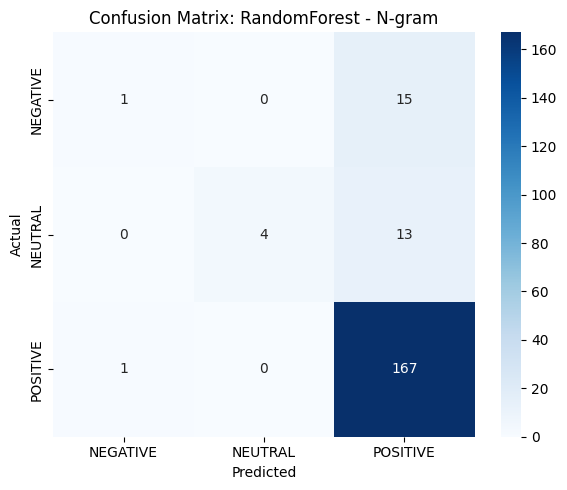

In [62]:
#Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
#WORD embedding
#1.bow
#2.tf-idf
#3.n-gram
#4.Word2vec
#5.glove
#library->gensim

In [ ]:
!pip install gensim



In [ ]:
from gensim.models import Word2Vec
sentence =[['they', 'may'],['they','have']]
model=Word2Vec(sentence,min_count=1)

ModuleNotFoundError: No module named 'numpy.char'

In [ ]:
model_w2v.wv.similarity(they,may)

NameError: name 'model_w2v' is not defined